<h1>Explaining the dataset</h1>

<ol>
<li>Region: This column indicates the region where the sales transaction took place. In this dataset, all entries belong to the "Europe" region.</li>
<li>Country: It specifies the country where the sales transaction occurred.</li>

<li>Item Type: This column describes the type of item that was sold in the transaction. Examples of item types include beverages, clothes, cereal, office supplies, fruits, etc.</li>

<li>Sales Channel: It indicates the channel through which the sales transaction was conducted. For example, "Offline" might refer to sales made in physical stores, while "Online" refers to sales made through the internet or digital platforms.</li>

<li>Order Priority: This column denotes the priority level of the order. It could be categorized into different priority levels such as high, medium, or low, represented by letters like 'H', 'M', 'L', or sometimes with numerical values.</li>

<li>Order Date: It represents the date when the order was placed.</li>

<li>Order ID: A unique identifier for each order.</li>

<li>Ship Date: This is the date when the ordered items were shipped.</li>

<li>Units Sold: It indicates the quantity of units sold in the transaction.</li>

<li>Unit Price: The price of each unit sold.</li>

<li>Unit Cost: The cost incurred per unit sold.</li>

<li>Total Revenue: This column calculates the total revenue generated from the sales transaction, which is calculated by multiplying the unit price by the number of units sold.</li>

<li>Total Cost: It represents the total cost associated with the transaction, calculated by multiplying the unit cost by the number of units sold.</li>

<li>Total Profit: This column shows the total profit generated from the sales transaction, which is calculated by subtracting the total cost from the total revenue.</li>
</ol>

In [15]:
%pip install matplotlib seaborn pandas numpy scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/Ferenc/iCloudDrive/Documents/hallerora/Europe Sales Records.csv')

In [19]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
1,Europe,Bosnia and Herzegovina,Clothes,Online,M,10/14/2013,919133651,11/4/2013,927,109.28,35.84,101302.56,33223.68,68078.88
2,Europe,Austria,Cereal,Offline,C,8/13/2014,987410676,9/6/2014,5616,205.70,117.11,1155211.20,657689.76,497521.44
3,Europe,Bulgaria,Office Supplies,Online,L,10/31/2010,672330081,11/29/2010,6266,651.21,524.96,4080481.86,3289399.36,791082.50
4,Europe,Estonia,Fruits,Online,L,9/28/2016,579463422,11/1/2016,4958,9.33,6.92,46258.14,34309.36,11948.78



<body>
<h1>Hypotesis:</h1>
<h2>-Impact of Sales Channel on Profitability:</h2>
<p><strong>Hypothesis:</strong> Online sales channels yield higher profitability compared to offline channels.</p>
<p><strong>Rationale:</strong> Online sales may have lower overhead costs and wider reach, potentially leading to higher profitability.</p>
<p><strong>Analysis:</strong> Compare the average profit margins between online and offline sales channels.</p>

<h2>-Effect of Order Priority on Total Revenue:</h2>
<p><strong>Hypothesis:</strong> Orders with higher priority levels result in higher total revenues.</p>
<p><strong>Rationale:</strong> Higher priority orders may indicate urgent or high-value transactions, which could contribute more to total revenue.</p>
<p><strong>Analysis:</strong> Examine the relationship between order priority levels and corresponding total revenue figures.</p>

<h1>Logistic regression:</h1>
<h2>-Predict the Sales Channel (Online/Offline)</h2>
<p>based on the following independent variables: Item Type, Order Priority, Units Sold, Unit Price, and Total Profit.</p>
</body>

<h1>1. Impact of Sales Channel on Profitability</h1>

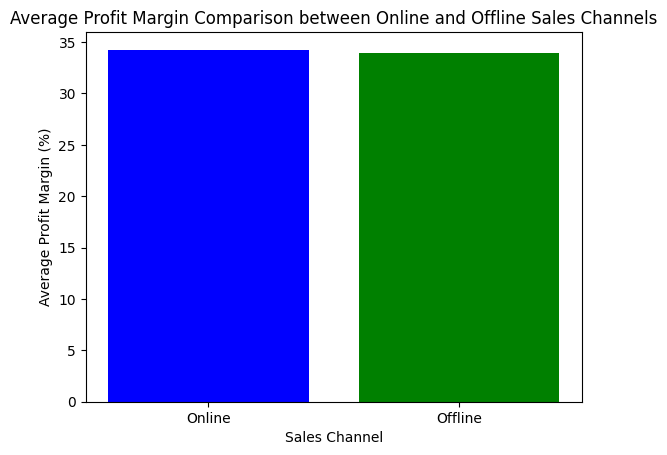

Average Profit Margin for Online Sales: 34.26%
Average Profit Margin for Offline Sales: 33.91%


In [20]:
# Filter the data for online and offline sales channels
online_sales = df[df['Sales Channel'] == 'Online']
offline_sales = df[df['Sales Channel'] == 'Offline']

# Calculate the profit margin for each sales channel
online_profit_margin = (online_sales['Total Profit'] / online_sales['Total Revenue']) * 100
offline_profit_margin = (offline_sales['Total Profit'] / offline_sales['Total Revenue']) * 100

# Compare the average profit margins between online and offline channels
avg_online_profit_margin = online_profit_margin.mean()
avg_offline_profit_margin = offline_profit_margin.mean()

# Visualize the comparison using a bar plot
plt.bar(['Online', 'Offline'], [avg_online_profit_margin, avg_offline_profit_margin], color=['blue', 'green'])
plt.title('Average Profit Margin Comparison between Online and Offline Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Average Profit Margin (%)')

plt.show()

print("Average Profit Margin for Online Sales: {:.2f}%".format(avg_online_profit_margin))
print("Average Profit Margin for Offline Sales: {:.2f}%".format(avg_offline_profit_margin))

<body>
    <p>Based on the analysis conducted, the average profit margin for online sales is slightly higher (34.26%) compared to offline sales (33.91%).</p>
    <p>This suggests that, on average, online sales channels may yield slightly higher profitability than offline channels. The rationale provided earlier, stating that online sales may have lower overhead costs and wider reach, potentially leading to higher profitability, seems to be supported by the data, albeit with a relatively small margin.</p>
</body>

<h1>2. Effect of Order Priority on Total Revenue</h1>

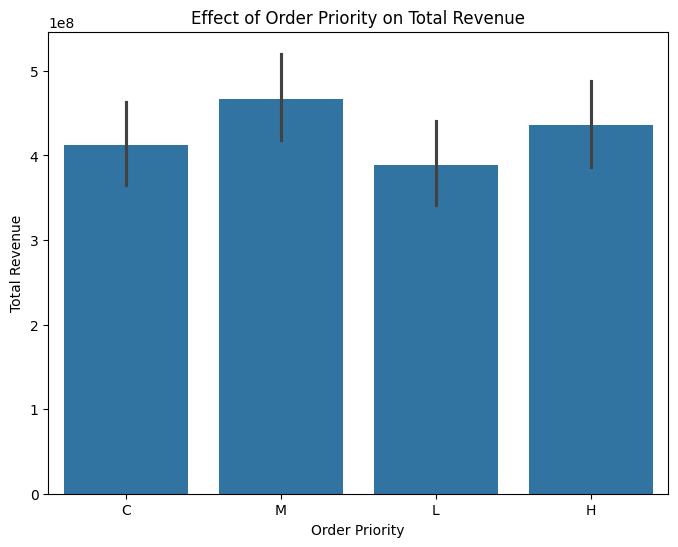

Total Revenue by Order Priority:
Order Priority
C    412253088
H    436294709
L    388509321
M    466564644
Name: Total Revenue, dtype: int32


In [36]:
import seaborn as sns

# Effect of Order Priority on Total Revenue
plt.figure(figsize=(8, 6))
sns.barplot(x='Order Priority', y='Total Revenue', data=df, estimator=sum)
plt.title('Effect of Order Priority on Total Revenue')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.show()
# Calculate the total revenue for each order priority level
total_revenue_by_priority = df.groupby('Order Priority')['Total Revenue'].sum()

# Print out the total revenue for each order priority level
print("Total Revenue by Order Priority:")
print(total_revenue_by_priority)


Based on the total revenue figures for different order priority levels:

- High priority (H) orders generated the highest total revenue of $436,294,709.
- Medium priority (M) orders followed closely behind with a total revenue of $466,564,644.
- Low priority (L) orders generated $388,509,321 in total revenue.
- Critical priority (C) orders yielded a total revenue of $412,253,088.

From these results, it appears that there is a positive correlation between order priority and total revenue. Specifically, higher priority orders (H and M) tend to result in higher total revenues compared to lower priority orders (L and C). 

Therefore, the hypothesis that orders with higher priority levels result in higher total revenues is supported by the data. Higher priority orders may indeed indicate urgent or high-value transactions, contributing more significantly to the total revenue.


C: Critical  
M: Medium  
L: Low  
H: High  

These priority levels indicate the urgency or importance of the orders. Orders with a higher priority level are usually processed or fulfilled more quickly or given more attention compared to those with lower priority levels.

For example:

- Critical (C) orders might need immediate attention or have strict deadlines.
- High (H) priority orders could be important but not as urgent as critical ones.
- Medium (M) priority orders might have some flexibility in terms of processing time.
- Low (L) priority orders might have the lowest urgency and can be processed at a slower pace.


<h1>Predict the Sales Channel (Online/Offline)</h1>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report



# Drop non-predictive columns (like Order ID, Order Date, Ship Date)
df.drop(columns=['Order ID', 'Order Date', 'Ship Date'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Region'] = label_encoder.fit_transform(df['Region'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Item Type'] = label_encoder.fit_transform(df['Item Type'])
df['Order Priority'] = label_encoder.fit_transform(df['Order Priority'])

# Convert Sales Channel to binary (0 for Offline, 1 for Online)
df['Sales Channel'] = plt['Sales Channel'].map({'Offline': 0, 'Online': 1})

# Separate features and target variable
X = plt.drop(columns=['Sales Channel'])
y = plt['Sales Channel']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


TypeError: 'module' object is not subscriptable